# Настройка деталей графиков 

Обычно созданные просто так графики `Matplotlib` выглядят сыро и необходимо приложить дополнительные усилия, чтобы довести их до ума. Благо `Matplotlib` позволяет управлять всеми элементами на графике. 

## Настройка фигуры 

Фигура несет не так много нагрузки при оформлении графика и большинство самых важных параметров уже было упомянуто.
- Размеры фигуры удобнее всего указывать на этапе создания параметром `figsize`. Он отвечает за размер генерируемого окна с графиком или за размер результирующей картинки при выводе на экран или сохранении в файл.
- Заголовок всей фигуры устанавливается методом [suptitle](https://matplotlib.org/3.5.0/api/figure_api.html#matplotlib.figure.Figure.suptitle);
- В качестве макета фигуры (параметр `layout`) в большинстве ситуаций предпочтительнее использовать значение `"tight"`.

У фигуры ещё можно настроить цвет фона и границ, но в большинстве случаев удобнее воспользоваться заранее созданными стилями.

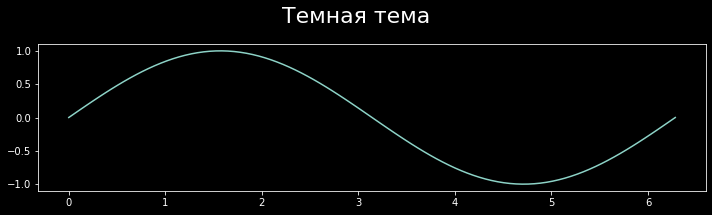

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2.*np.pi, 100)
y = np.sin(x)


with plt.style.context('dark_background'): # исполнить следующие операции, применяя стиль 'dark_background'
    fig, ax = plt.subplots(figsize=(10, 3), layout="tight")
    fig.suptitle("Темная тема", size=22)
    ax.plot(x, y)

## Диапазон значений 

`Matplotlib` автоматически подбирает диапазон значений, но иногда может потребоваться вмешаться, чтобы, например, сфокусировать внимание на какой-то отдельной части графика.  В таких случаях всегда можно настроить, какой диапазон значений будет захвачен графиков вдоль каждой оси.

Продемонстрируем принцип работы на примере. Для этого воспользуемся генерирующим [снежинку Коха](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BE%D1%85%D0%B0) кодом из официальной документации `Matplotlib` ([ссылка](https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py)). Этот код находится под спойлером ниже.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

Чтобы продемонстрировать фрактальную природу снежинки Коха, построим её целиком, а также отдельный её кусок в разном масштабе. Для этого удобно воспользоваться методами [set_xlim](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xlim.html?highlight=axes%20set_xlim#matplotlib.axes.Axes.set_xlim) и [set_ylim](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xlim.html?highlight=axes%20set_ylim#matplotlib.axes.Axes.set_ylim).

Text(0.5, 1.0, '30:1')

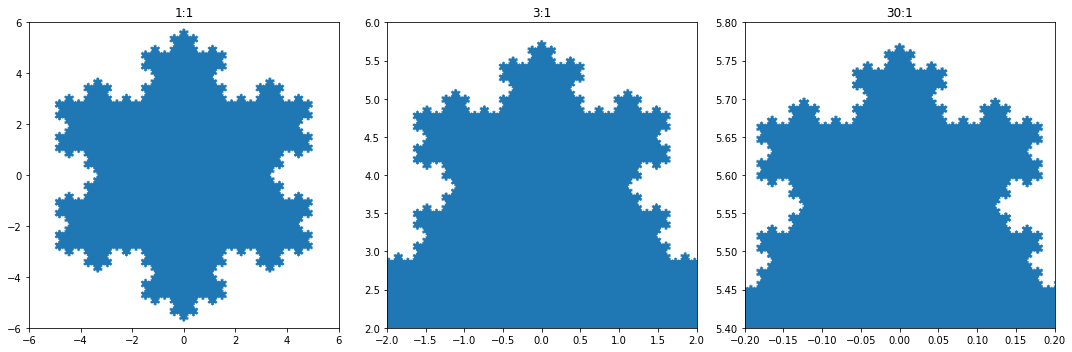

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# генерация данных
x, y = koch_snowflake(order=10)

# создание фигуры с тремя осями и построение одинаковых графиков в них
fig, axs = plt.subplots(figsize=(15, 5), ncols=3, layout="tight")
for ax in axs:
    ax.fill(x, y)

# настройка диапазонов значений по осям и заголовка в первых осях
axs[0].set_xlim(-6, 6)
axs[0].set_ylim(-6, 6)
axs[0].set_title("1:1")

# настройка диапазонов значений по осям и заголовка во вторых осях
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(2, 6)
axs[1].set_title("3:1")

# настройка диапазонов значений по осям и заголовка в третьих осях
axs[2].set_xlim(-0.2, 0.2)
axs[2].set_ylim(5.4, 5.8)
axs[2].set_title("30:1")

## Масштабы осей

По умолчанию используется линейный масштаб вдоль всех осей, но иногда нагляднее логарифмический масштаб. Настраивать масштаб вдоль осей удобнее всего методами [set_xscale](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xscale.html) и [set_yscale](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_yscale.html).

В ячейке ниже демонстрируется применение этих методов.

Text(0, 0.5, 'логарифмический масштаб')

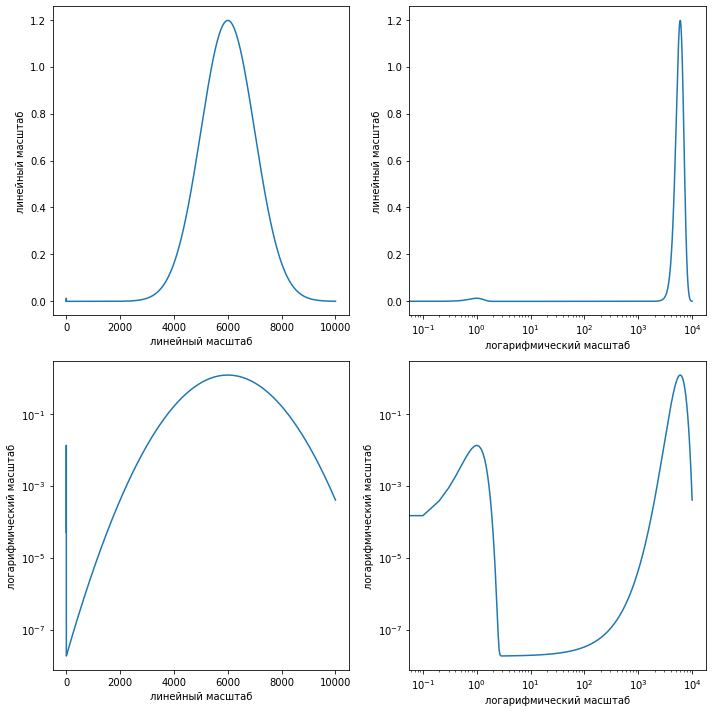

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# генерация данных
x = np.linspace(0, 10000, 100000)
y1 = 0.01 * norm.pdf(x, loc=1, scale=0.3)
y2 = 3000 * norm.pdf(x, loc=6000, scale=1000)
y = y1 + y2

# построение одного и того же графика в четырех осях
fig, axs = plt.subplots(figsize=(10, 10), ncols=2, nrows=2, layout="tight")
for ax in axs.flatten():
    ax.plot(x, y)

# установка масштабов 
axs[0, 0].set_xlabel("линейный масштаб")
axs[0, 0].set_ylabel("линейный масштаб")

axs[0, 1].set_xscale("log")
axs[0, 1].set_xlabel("логарифмический масштаб")
axs[0, 1].set_ylabel("линейный масштаб")

axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel("линейный масштаб")
axs[1, 0].set_ylabel("логарифмический масштаб")

axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel("логарифмический масштаб")
axs[1, 1].set_ylabel("логарифмический масштаб")

## Заголовки

У каждого `Axes` можно выставить заголовок методом [set_title](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_title.html). Полезно помнить, что ещё можно выставить заголовок у всей фигуры целиком.

Text(0.5, 1.0, 'Заголовок осей №2')

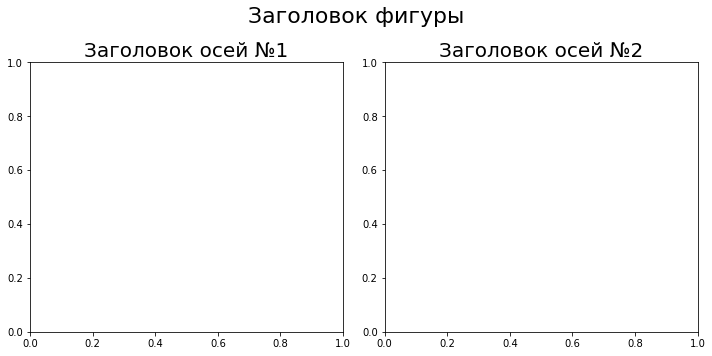

In [6]:
import numpy as np
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
fig.suptitle("Заголовок фигуры", size=22) 

ax1.set_title("Заголовок осей №1", size=20)
ax2.set_title("Заголовок осей №2", size=20)

## Подписи к осям

Гораздо проще интерпретировать, что изображено на графике, если в явном виде указано, что отложено по осям. За подписи к осям отвечают методы [set_xlabel](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) и [set_ylabel](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

Text(0, 0.5, 'Скорость, м/с')

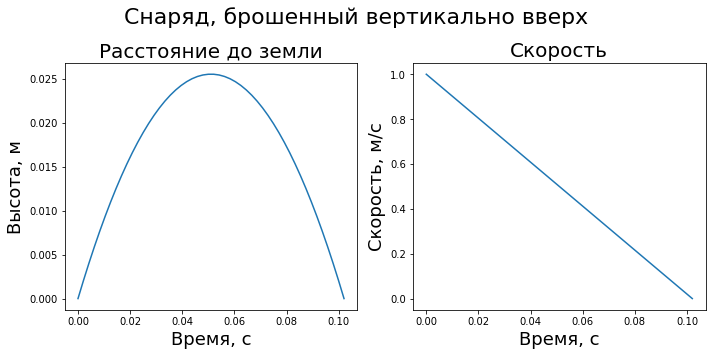

In [7]:
import numpy as np
from matplotlib import pyplot as plt

# генерация данных
y0 = 0                  # м
v0 = 1                  # м/с
g = 9.8                 # м/(c^2)
t_final = v0 / g

t = np.linspace(0, t_final)   # с
v = v0 - g * t          # м/с
y = y0 + v * t          # м


# создание фигуры с двумя осями
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
fig.suptitle("Снаряд, брошенный вертикально вверх", size=22)

# построение графиков в первых осях и подписей к ним
ax1.plot(t, y)
ax1.set_title("Расстояние до земли", size=20)
ax1.set_xlabel("Время, с", size=18)
ax1.set_ylabel("Высота, м", size=18)

# построение графиков во вторых осях и подписей к ним
ax2.plot(t, v)
ax2.set_title("Скорость", size=20)
ax2.set_xlabel("Время, с", size=18)
ax2.set_ylabel("Скорость, м/с", size=18)

## Легенда графика

Если в одних осях построено много графиков, то необходимо выводить легенду графика, чтобы можно было визуально определить, какая линия на графике соответствует какой зависимости. Проще всего добиться полноценной легенды следующим образом:
- при создании каждого `artist` указывать `label`;
- в конце вызвать метод [legend](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.legend.html) у осей, чтобы автоматически сформировать легенду графика из указанных меток `label`.

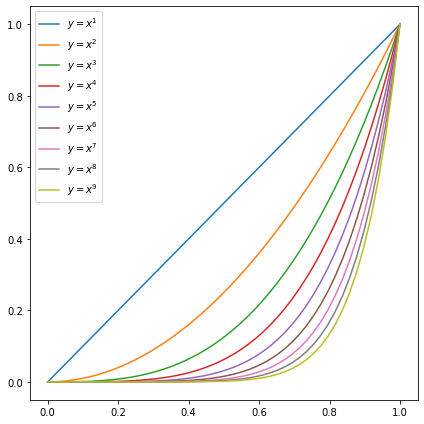

In [8]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 1)

fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
for power in range(1, 10):
    ax.plot(x, x ** power, label=fr"$y=x^{power}$")

ax.legend()

## Отсечки и координатная сетка

`Matplotlib` автоматически генерирует и набор отсечек (`ticks`) вдоль осей, но можно в ручную указать как и набор отсечек вдоль каждой оси, так и набор меток для вывода рядом с ними (`tick label`). Для изменения количества и локацию отсечек удобно использовать методы [set_xticks](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) и [set_yticks](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_yticks.html), а для изменения меток рядом с ними --- методы [set_xticklabels](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) и [set_yticklabels](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html).

Метод [grid](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.grid.html) включает (или выключает) отображение координатной сетки, линии которой, кстати, определяются отсечками вдоль осей.

Ниже демонстрируется применение этих методов.

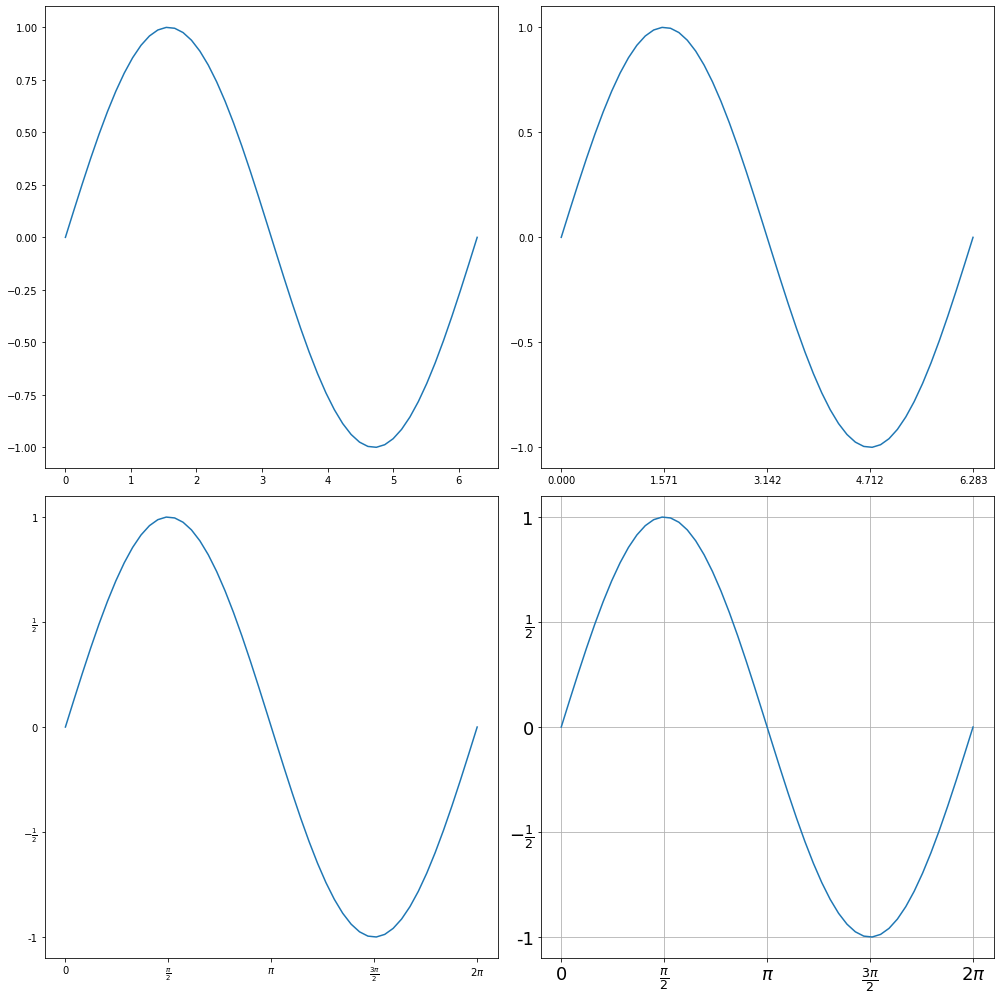

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# генерация данных
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

# положения отсечек
x_ticks = np.linspace(0, 2*np.pi, 5)
y_ticks = np.linspace(-1, 1, 5)

# метки отсечек
x_tickslabels = ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
y_tickslabels = ["-1", r"$-\frac{1}{2}$", "0", r"$\frac{1}{2}$", "1"]
size = 18

# построение одинакового графика в четырех осях
fig, axs = plt.subplots(figsize=(14, 14), ncols=2, nrows=2, layout="tight")
for ax in axs.flatten():
    ax.plot(x, y)
    

# изменение только положения отсечек в правых верхних осях
axs[0, 1].set_xticks(x_ticks)
axs[0, 1].set_yticks(y_ticks)

# изменение положение отсечек и их меток в левых нижних осях
axs[1, 0].set_xticks(x_ticks)
axs[1, 0].set_yticks(y_ticks)
axs[1, 0].set_xticklabels(x_tickslabels)
axs[1, 0].set_yticklabels(y_tickslabels)

# указан размер отсечек
axs[1, 1].set_xticks(x_ticks)
axs[1, 1].set_yticks(y_ticks)
axs[1, 1].set_xticklabels(x_tickslabels, size=size)
axs[1, 1].set_yticklabels(y_tickslabels, size=size)
axs[1, 1].grid()
